# How to import multiple years of NYS Mesonet data and make basic time series
## This notebook will cover the basics of the following:
 * Xarray's open_mfdataset function
     * http://xarray.pydata.org/en/stable/generated/xarray.open_mfdataset.html
 * plotting using matplotlib.pyplot
     * https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

## First import the necessary packages

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

## Next we will import NYS Mesonet data for 2019 and 2020
* xr.open_mfdataset loads in the data as an xarray Dataset of dask arrays to save memory
* Dask arrays don't load data into memory until calculations are done
* To see variable output, you can append .values to the end of the dataset

### First we will define a function to load in NYS Mesonet data

In [4]:
def load_nysm(path, years):
    """This function will load in NYS Mesonet data for multiple years. This function can be used to
    load in one year or more of NYS Mesonet data
    
    path: path to where NYS Mesonet data is stored. Input as a string
    
    year: years of NYS Mesonet data to be loaded. Input as list of strings"""
    
    for n in range(0, len(years)):
        #This will load in NYS Mesonet data for the first year
        if n==0:
            #Starting in October of 2020 the NYS Mesonet station id format changed
            #Pre-October 2020 station ids were bit strings
            #October 2020 onward station ids are string
            #xr.open_mfdataset will not work with two types of character for the station id
            #to deal with this we will use the following if/else statement
            if int(years[n])==2020:
                #The * is a wildcard in python, any filename that starts with what is before it will be loaded
                nysm_1 = xr.open_mfdataset(path+years[n]+'/'+years[n]+'0*')
                #This command converts the station id from a bit string to a string
                nysm_1['station']=nysm_1.station.astype('U13')
                nysm_2 = xr.open_mfdataset(path+years[n]+'/'+years[n]+'1*')
                #This command combines the two datasets into one
                nysm = xr.combine_by_coords([nysm_1, nysm_2])
                
            else:
                nysm = xr.open_mfdataset(path+years[n]+'/'+years[n]+'*')
                #This command converst the station id to a string
                nysm['station']=nysm.station.astype('U13')
        else:
            #We also need to use the above it statement in case 2020 data come after the first desired year
            if int(years[n])==2020:
                #The * is a wildcard in python, any filename that starts with what is before it will be loaded
                nysm_1 = xr.open_mfdataset(path+years[n]+'/'+years[n]+'0*')
                #This command converts the station id from a bit string to a string
                nysm_1['station']=nysm_1.station.astype('U13')
                nysm_2 = xr.open_mfdataset(path+years[n]+'/'+years[n]+'1*')
                #This command combines the two datasets into one
                nysm_x = xr.combine_by_coords([nysm_1, nysm_2])
                
            else:
                nysm_x = xr.open_mfdataset(path+years[n]+'/'+years[n]+'*')
                #This command converst the station id to a string
                nysm_x['station']=nysm_x.station.astype('U13')
            #When trying to merge 2020 and 2021 data, the attributes can cause a merge issue
            #The issue is due to the last updated time. 2020 and 2021 last updated date is off by 12 hours
            #To fix this issue, the attributes from 2020 is assigned to 2021 data before merging
            nysm_x = nysm_x.assign_attrs(nysm.attrs)
            #This command combines the first year of NYS Mesonet data with the following years
            nysm = xr.combine_by_coords([nysm,nysm_x])
    #The time index for NYS Mesonet data is called time_5M
    #I prefer to rename it to date as this name is a bit more intuitive
    #If you want to keep the original naming convention, just comment the following line out
    nysm = nysm.rename({'time_5M':'date'})
    return nysm

### Next we will load in the NYS Mesonet data for 2019 and 2020 using our function

In [16]:
path = '/network/rit/lab/minderlab_rit/NYSM/standard/netCDF/'
years = ['2019', '2020']
nysm = load_nysm(path, years)

### Print nysm to see what the data looks like
   * with xarray datasets, you can just type the name of the dataset and get an interactive drop down of the different variable names and coordinates

In [20]:
nysm

,Array,Chunk
Bytes,88.83 MB,145.15 kB
Shape,"(176256, 126)","(288, 126)"
Count,3307 Tasks,612 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,88.83 MB,145.15 kB
Shape,"(176256, 126)","(288, 126)"
Count,3307 Tasks,612 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


## Now lets plot some snow depth data from the 2019-2020 winter

### First we will plot a timeseries of snow depth from the Whiteface Mountain Base (WFMB) station 

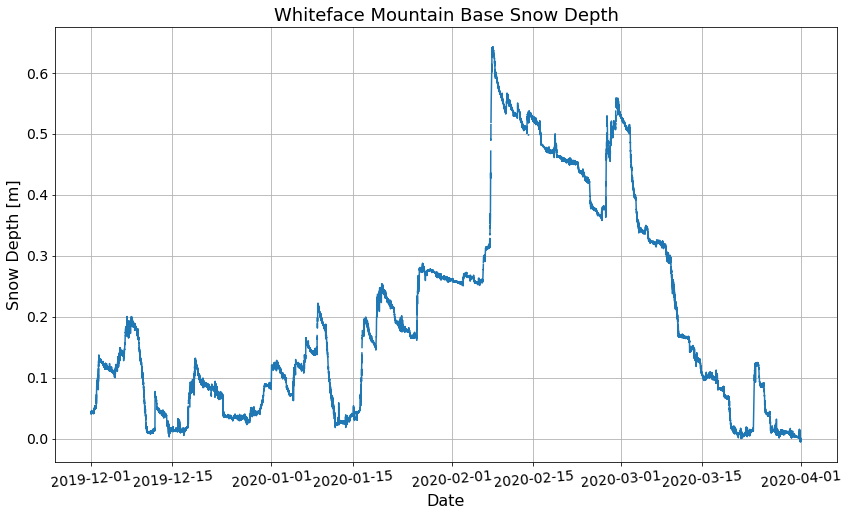

In [25]:
#define data for plotting
#slice command in the date selection will pull all the dates from the start of December 2019 through the end of March 2020
nysm_plot = nysm.sel(station = 'WFMB', date = slice('2019-12','2020-3'))

#set font size for plot labels
fs = 16

fig, ax = plt.subplots(figsize = (14,8))
ax.plot(nysm_plot.date, nysm_plot.snow_depth)
#if we look back at the printed nysm data above, we can see that the units for snow depth are in meters
ax.set_ylabel('Snow Depth [m]', fontsize = fs)
ax.set_xlabel('Date', fontsize = fs)
#give the plot a descriptive title
ax.set_title('Whiteface Mountain Base Snow Depth', fontsize = fs+2)
#This command give you control over axis tick parameters
#We'll use it to set the labelsize of the axis ticks
ax.tick_params(axis='both', labelsize = fs-2)
ax.tick_params(axis='x', rotation = 5)
#add a grid
ax.grid()

## Now let's plot two stations of snow depth on the same plot
* We'll look at Whiteface Mountain Base (WFMB) again and Redfield (REDF), a site on the Tug Hill Plateau that recieves heavy lake-effect snow

In [26]:
#define data for plotting
#you can select multiple stations by inputing a list instead of just one station
nysm_plot = nysm.sel(station = ['WFMB', 'REDF'], date = slice('2019-12','2020-3'))

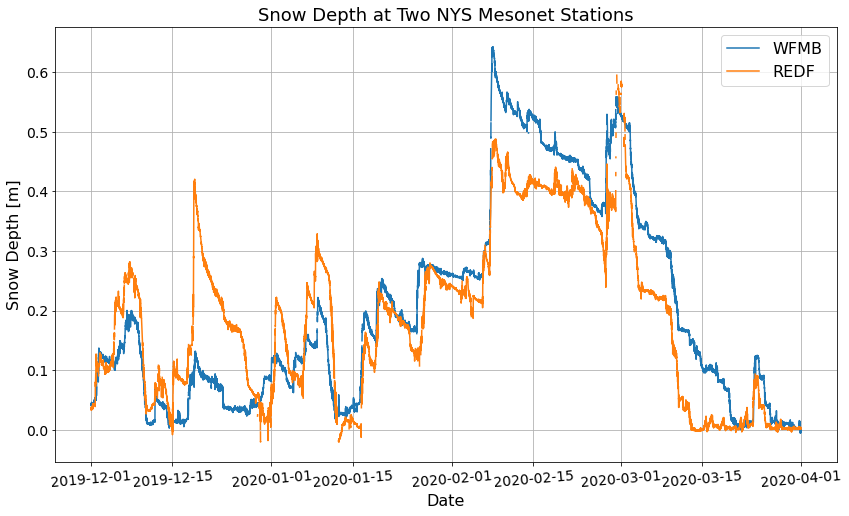

In [29]:
#set font size for plot labels
fs = 16

fig, ax = plt.subplots(figsize = (14,8))
#adding the label option will label create a label for the line for a legend
ax.plot(nysm_plot.date, nysm_plot.sel(station='WFMB').snow_depth, label='WFMB')
ax.plot(nysm_plot.date, nysm_plot.sel(station='REDF').snow_depth, label='REDF')
#if we look back at the printed nysm data above, we can see that the units for snow depth are in meters
ax.set_ylabel('Snow Depth [m]', fontsize = fs)
ax.set_xlabel('Date', fontsize = fs)
#give the plot a descriptive title
ax.set_title('Snow Depth at Two NYS Mesonet Stations', fontsize = fs+2)
#This command give you control over axis tick parameters
#We'll use it to set the labelsize of the axis ticks
ax.tick_params(axis='both', labelsize = fs-2)
ax.tick_params(axis='x', rotation = 5)
#add a grid
ax.grid()
#add a legend, so we know which line is which
ax.legend(fontsize = fs)

## Last, we'll make a multiple panel plot showing snow depth and 2m temperature at Whiteface Mountain Base

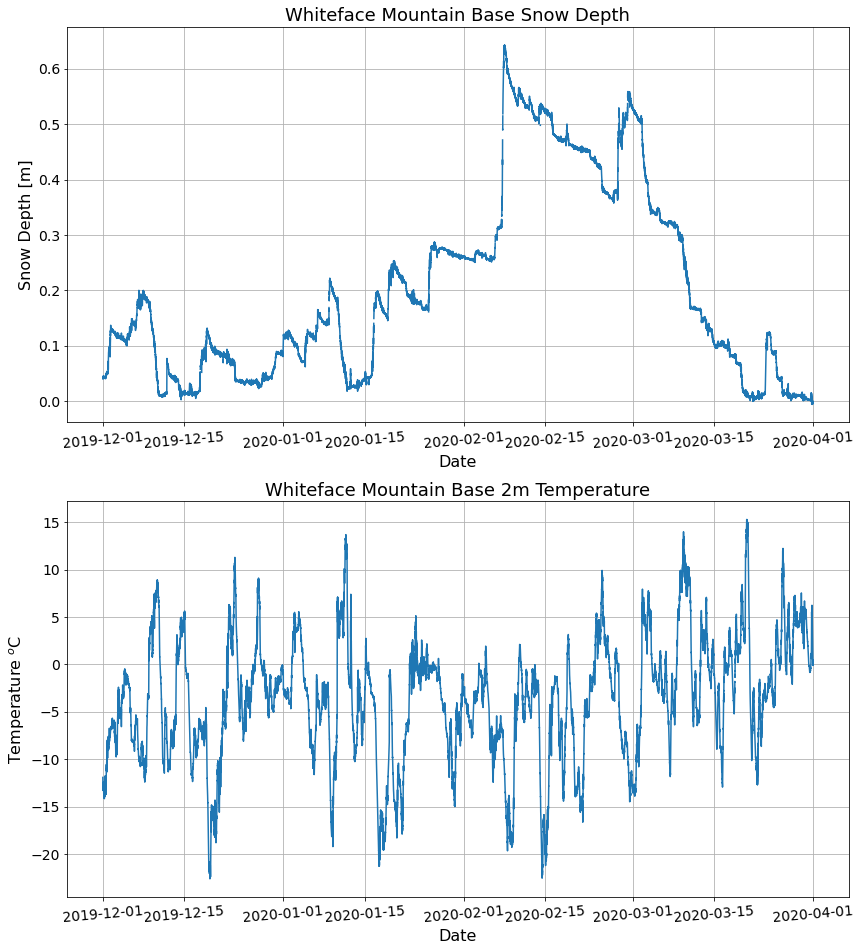

In [31]:
#define data for plotting
#slice command in the date selection will pull all the dates from the start of December 2019 through the end of March 2020
nysm_plot = nysm.sel(station = 'WFMB', date = slice('2019-12','2020-3'))

#set font size for plot labels
fs = 16

#This will create two vertically stacked plots with ax1 being the top plot and ax2 being the bottom plot
#If you wanted to have the plots horizontally stacked, you would do fig, (ax1, ax2) = plt.subplots(1,2)
fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(14,16))
#Plot snow depth on top plot
ax1.plot(nysm_plot.date, nysm_plot.snow_depth)
ax1.set_ylabel('Snow Depth [m]', fontsize = fs)
ax1.set_xlabel('Date', fontsize = fs)
#give the plot a descriptive title
ax1.set_title('Whiteface Mountain Base Snow Depth', fontsize = fs+2)
#This command give you control over axis tick parameters
#We'll use it to set the labelsize of the axis ticks
ax1.tick_params(axis='both', labelsize = fs-2)
#add a little rotation to the x axis tick labels to make them more readable
ax1.tick_params(axis='x', rotation = 5)
#add a grid
ax1.grid()

#Plot 2m temperature on bottom plot
ax2.plot(nysm_plot.date, nysm_plot.tair)
#If we look at the nysm data we printed previously, we can see that 2m temperature is in units of degrees Celcius
#you can make superscripts in plot labels using $^*$ with the * being what you want in the superscript
ax2.set_ylabel('Temperature $^o$C', fontsize = fs)
ax2.set_xlabel('Date', fontsize = fs)
ax2.set_title('Whiteface Mountain Base 2m Temperature', fontsize = fs+2)
ax2.tick_params(axis='both', labelsize=fs-2)
ax2.tick_params(axis='x', rotation=5)
ax2.grid()
